<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Generate-the-Features" data-toc-modified-id="Generate-the-Features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generate the Features</a></span></li><li><span><a href="#Generate-Logical-AND-Data" data-toc-modified-id="Generate-Logical-AND-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generate Logical AND Data</a></span></li><li><span><a href="#Generate-Logical-OR-Data" data-toc-modified-id="Generate-Logical-OR-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generate Logical OR Data</a></span></li><li><span><a href="#Generate-Logical-XOR-Data" data-toc-modified-id="Generate-Logical-XOR-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Generate Logical XOR Data</a></span></li><li><span><a href="#The-plot-function" data-toc-modified-id="The-plot-function-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>The plot function</a></span></li><li><span><a href="#Plot-the-Logical-AND-Data" data-toc-modified-id="Plot-the-Logical-AND-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plot the Logical AND Data</a></span></li><li><span><a href="#Plot-the-Logical-OR-Data" data-toc-modified-id="Plot-the-Logical-OR-Data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Plot the Logical OR Data</a></span></li><li><span><a href="#Plot-the-Logical-XOR-Data" data-toc-modified-id="Plot-the-Logical-XOR-Data-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Plot the Logical XOR Data</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Discussion</a></span></li><li><span><a href="#The-perceptron-classifier" data-toc-modified-id="The-perceptron-classifier-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>The perceptron classifier</a></span></li><li><span><a href="#Train-and-Test-the-Perceptron-on-the-Logical-AND-Data" data-toc-modified-id="Train-and-Test-the-Perceptron-on-the-Logical-AND-Data-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Train and Test the Perceptron on the Logical AND Data</a></span></li><li><span><a href="#Train-and-Test-the-Perceptron-on-the-Logical-OR-Data" data-toc-modified-id="Train-and-Test-the-Perceptron-on-the-Logical-OR-Data-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Train and Test the Perceptron on the Logical OR Data</a></span></li><li><span><a href="#Train-and-Test-the-Perceptron-on-the-Logical-XOR-Data" data-toc-modified-id="Train-and-Test-the-Perceptron-on-the-Logical-XOR-Data-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Train and Test the Perceptron on the Logical XOR Data</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Discussion</a></span></li></ul></div>

<b>

<p>
<center>
<font size="5">
Machine Learning I (DATS 6202 - O10), Spring 2019
</font>
</center>
</p>

<p>
<center>
<font size="4">
Exercise 4 (Solution)
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Author: Yuxiao Huang
</font>
</center>
</p>

</b>

# Overview
- Apply Perceptron to (simulated) linearly separable and non-linearly separable data
- Particularly, you should implement your own model (using numpy array)
- Complete the missing parts indicated by # Implement me
- Particularly, the code should
    - be bug-free (while the output produced by your solution being the same as the provided output does not necessarily mean your code is bug-free, it is very likely that there is a bug in your code when the two kinds of output are different)
    - be commented

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Generate the Features

In [2]:
import numpy as np
np.random.seed(1)

X_train = np.random.randint(2, size=(100, 2))
X_test = np.random.randint(2, size=(100, 2))

# Generate Logical AND Data

In [3]:
y_logical_and_train = np.logical_and(X_train[:, 0], X_train[:, 1])
y_logical_and_test = np.logical_and(X_test[:, 0], X_test[:, 1])

# Generate Logical OR Data

In [4]:
y_logical_or_train = np.logical_or(X_train[:, 0], X_train[:, 1])
y_logical_or_test = np.logical_or(X_test[:, 0], X_test[:, 1])

# Generate Logical XOR Data

In [5]:
y_logical_xor_train = np.logical_xor(X_train[:, 0], X_train[:, 1])
y_logical_xor_test = np.logical_xor(X_test[:, 0], X_test[:, 1])

# The plot function

In [6]:
import matplotlib.pyplot as plt

def plot(X, y, title):
    """
    Draw the scatter plot
    
    Parameters
    ----------
    X : the feature matrix
    y : the target vector
    title : the title of the scatter plot
    """

    # The scatter plot
    plt.scatter(X[y == 1, 0],
                X[y == 1, 1],
                s=100,
                c='b',
                marker='x',
                label='1')
    plt.scatter(X[y == 0, 0],
                X[y == 0, 1],
                s=100,
                c='r',
                marker='s',
                label='0')

    # The x-axis
    plt.xlim([-1, 2])
    plt.xticks([-1, 0, 1, 2], fontsize=20)
    plt.xlabel('x1', fontsize=20)

    # The y-axis
    plt.ylim([-1, 2])
    plt.yticks([-1, 0, 1, 2], fontsize=20)
    plt.ylabel('x2', fontsize=20)

    # The title and legend
    plt.title(title, fontsize=20)
    plt.legend(loc='best', fontsize=20)
    
    plt.tight_layout()
    plt.show()

# Plot the Logical AND Data

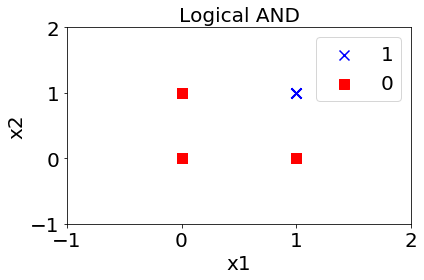

In [7]:
plot(X_train, y_logical_and_train, 'Logical AND')

# Plot the Logical OR Data

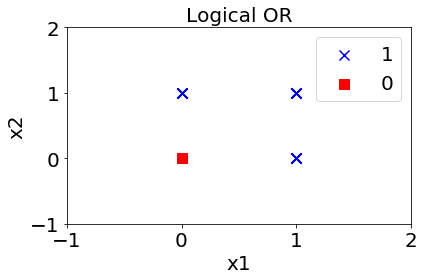

In [8]:
plot(X_train, y_logical_or_train, 'Logical OR')

# Plot the Logical XOR Data

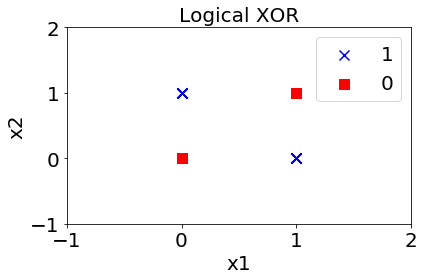

In [9]:
plot(X_train, y_logical_xor_train, 'Logical XOR')

# Discussion
Can you verify whether the data were generated correctly by checking the scatter plots above?

# The perceptron classifier

In [10]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MyPerceptron(BaseEstimator, ClassifierMixin):
    """The perceptron classifier (implemented using numpy array)"""
        
    def __init__(self, n_iter=100, eta=0.01):
        # The number of iterations
        self.n_iter = n_iter
        
        # The learning rate
        self.eta = eta

    def fit(self, X, y):
        """
        The fit function
        
        Parameters
        ----------
        X : the feature matrix
        y : the target vector
        """
        
        # Implement me
        # Initialize the weight (using zero) for features x0 (the dummy feature), x1, x2, ..., xn 
        self.w = np.zeros(1 + X.shape[1])

        # For each iteration
        for _ in range(self.n_iter):
            # Get the net input Z (using the net_input function defined below)
            z = self.net_input(X)
            
            # Get the activation f (using the activation function defined below)
            f = self.activation(z)
            
            # Get the errors
            errors = y - f
            
            # Update the weights for features x1, x2, ..., xn
            self.w[1:] += self.eta * X.T.dot(errors)
            
            # Update the weights for the dummy feature, x0
            self.w[0] += self.eta * errors.sum()

    def net_input(self, X):
        """
        Get the net input z
        
        Parameters
        ----------
        X : the feature matrix
        
        Returns
        ----------
        The net input
       
        """
        
        # Implement me
        return np.matmul(X, self.w[1:]) + self.w[0]
    
    def activation(self, z):
        """
        Here we use the hard limit function, f(z), as the activation function:
        f(z) = 1, if z >=0
        f(z) = 0, if z < 0
        
        Parameters
        ----------
        z : the net input
        
        Returns
        ----------
        f(z)      
        """

        # Implement me
        return (z >= 0) * 1
        
    def predict(self, X):
        """
        The predict function
        
        Parameters
        ----------
        X : the feature matrix
        
        Returns
        ----------
        The predicted class labels of the target
        """

        # Implement me
        # Get the net input z (using the net_input function defined above)
        z = self.net_input(X)

        # Get the activation f (using the activation function defined above)
        f = self.activation(z)
            
        return f

# Train and Test the Perceptron on the Logical AND Data

In [11]:
my_perceptron = MyPerceptron()
my_perceptron.fit(X_train, y_logical_and_train)

print('------------------------')
print('The weights are:')
print('w0: ', round(my_perceptron.w[0], 2))
print('w1: ', round(my_perceptron.w[1], 2))
print('w2: ', round(my_perceptron.w[2], 2))

------------------------
The weights are:
w0:  -0.5
w1:  0.4
w2:  0.49


In [12]:
y_pred = my_perceptron.predict(X_test)

print('The nubmer of wrong predictions:', abs(y_logical_and_test - y_pred).sum())

The nubmer of wrong predictions: 0


# Train and Test the Perceptron on the Logical OR Data

In [13]:
my_perceptron = MyPerceptron()
my_perceptron.fit(X_train, y_logical_or_train)

print('------------------------')
print('The weights are:')
print('w0: ', round(my_perceptron.w[0], 2))
print('w1: ', round(my_perceptron.w[1], 2))
print('w2: ', round(my_perceptron.w[2], 2))

y_pred = my_perceptron.predict(X_test)

print('The nubmer of wrong predictions:', abs(y_logical_or_test - y_pred).sum())

------------------------
The weights are:
w0:  -0.08
w1:  0.52
w2:  0.49
The nubmer of wrong predictions: 0


# Train and Test the Perceptron on the Logical XOR Data

In [14]:
my_perceptron = MyPerceptron()
my_perceptron.fit(X_train, y_logical_xor_train)

print('------------------------')
print('The weights are:')
print('w0: ', round(my_perceptron.w[0], 2))
print('w1: ', round(my_perceptron.w[1], 2))
print('w2: ', round(my_perceptron.w[2], 2))

y_pred = my_perceptron.predict(X_test)

print('The nubmer of wrong predictions:', abs(y_logical_xor_test - y_pred).sum())

------------------------
The weights are:
w0:  -0.05
w1:  -0.08
w2:  -0.14
The nubmer of wrong predictions: 49


# Discussion
As shown above, when applied to linearly separable data (logical AND and logical OR), perceptron makes no wrong predictions (can you prove this using the weights of the perceptron displayed above?). However, when applied to non-linearly separable data (logical XOR), perceptron makes wrong predictions almost half of the time. This is why in reality we do not use perceptron itself as a classifier. Instead, we combine them (hierarchically) to form a network to address non-linearly separable problems. Such network is called *Neural Network* (a.k.a., Multi-layer Perceptron). In Homework 5, we will discuss a simple neural network to classify the logical XOR data.